In [3]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [4]:
churn_df = pd.read_csv('fiks copy.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(churn_df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
label_encoder = LabelEncoder()
churn_df['InternetService'] = label_encoder.fit_transform(churn_df['InternetService'])
churn_df['PhoneService'] = label_encoder.fit_transform(churn_df['PhoneService'])
churn_df['MultipleLines'] = label_encoder.fit_transform(churn_df['MultipleLines'])
churn_df['OnlineSecurity'] = label_encoder.fit_transform(churn_df['OnlineSecurity'])
churn_df['OnlineBackup'] = label_encoder.fit_transform(churn_df['OnlineBackup'])
churn_df['DeviceProtection'] = label_encoder.fit_transform(churn_df['DeviceProtection'])
churn_df['TechSupport'] = label_encoder.fit_transform(churn_df['TechSupport'])
churn_df['StreamingTV'] = label_encoder.fit_transform(churn_df['StreamingTV'])
churn_df['StreamingMovies'] = label_encoder.fit_transform(churn_df['StreamingMovies'])
churn_df['Contract'] = label_encoder.fit_transform(churn_df['Contract'])
churn_df['PaperlessBilling'] = label_encoder.fit_transform(churn_df['PaperlessBilling'])
churn_df['Dependents'] = label_encoder.fit_transform(churn_df['Dependents'])
churn_df['Partner'] = label_encoder.fit_transform(churn_df['Partner'])
churn_df['PaymentMethod'] = label_encoder.fit_transform(churn_df['PaymentMethod'])
churn_df['gender'] = label_encoder.fit_transform(churn_df['gender'])
churn_df['Churn'] = label_encoder.fit_transform(churn_df['Churn'])
churn_df['MonthlyCharges'] = label_encoder.fit_transform(churn_df['MonthlyCharges'])
churn_df['TotalCharges'] = label_encoder.fit_transform(churn_df['TotalCharges'])

In [7]:
churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


In [8]:
del churn_df['customerID']
# del churn_df['TotalCharges']
# del churn_df['MonthlyCharges']

print(churn_df.dtypes)
churn_df.head()



gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [9]:
x = churn_df.drop('Churn',axis=1)
y = churn_df['Churn']

chi_scores = chi2(x,y)
chi_scores

(array([2.58698618e-01, 1.34351545e+02, 8.24120826e+01, 1.33036443e+02,
        1.62789237e+04, 9.72606249e-02, 9.74692078e+00, 9.82102823e+00,
        5.51611529e+02, 2.30086520e+02, 1.91303140e+02, 5.23303866e+02,
        7.49020319e+00, 8.23539949e+00, 1.11578017e+03, 1.05680863e+02,
        5.84922505e+01, 7.94523511e+04, 1.61648302e+03]),
 array([6.11015635e-001, 4.57695863e-031, 1.10476396e-019, 8.87672856e-031,
        0.00000000e+000, 7.55142091e-001, 1.79623344e-003, 1.72527862e-003,
        5.61588231e-122, 5.70786894e-052, 1.65153873e-043, 8.08623624e-116,
        6.20355560e-003, 4.10811292e-003, 1.22794132e-244, 8.66198711e-025,
        2.04093269e-014, 0.00000000e+000, 0.00000000e+000]))

<Axes: >

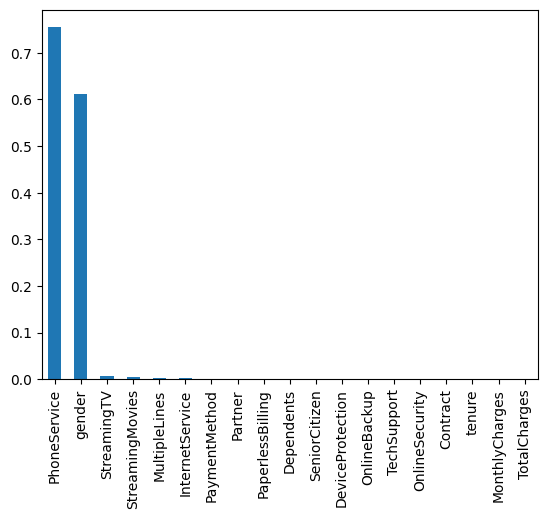

In [10]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()